KNN Classification Result for [6 8]: Pass


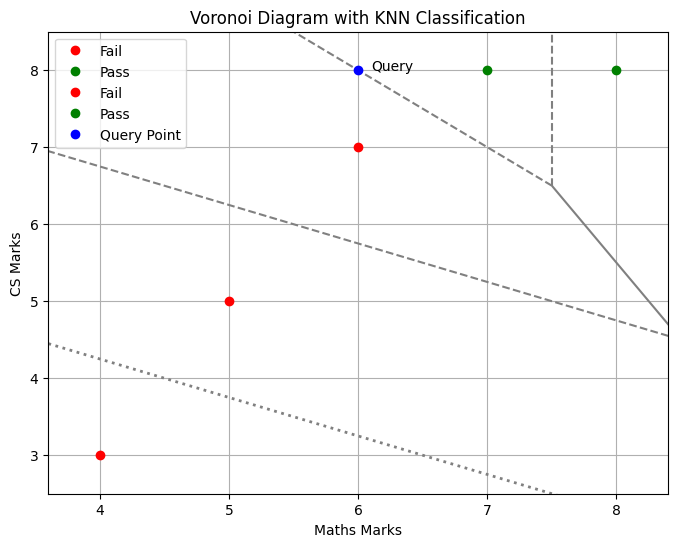

Voronoi Region Classification Result for [6 8]: Fail


In [6]:
# 🧠 KNN & Voronoi Assignment - CSC612
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import euclidean

# Training data
points = np.array([
    [4, 3],  # Fail
    [6, 7],  # Fail
    [7, 8],  # Pass
    [5, 5],  # Fail
    [8, 8],  # Pass
])
results = ['Fail', 'Fail', 'Pass', 'Fail', 'Pass']

# Query point
query = np.array([6,8])
k = 3

# Calculate Euclidean distances
distances = [euclidean(query, pt) for pt in points]
sorted_indices = np.argsort(distances)
nearest_k = sorted_indices[:k]

# Majority voting
votes = [results[i] for i in nearest_k]
final_result_knn = max(set(votes), key=votes.count)

print(f"KNN Classification Result for {query}: {final_result_knn}")

# Voronoi Diagram
vor = Voronoi(points)
# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Plot Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=1.5)

# Plot training points
for i, (point, result) in enumerate(zip(points, results)):
    color = 'red' if result == 'Fail' else 'green'
    ax.plot(point[0], point[1], 'o', label=f'{result}' if i == 0 or result != results[i-1] else "", color=color)

# Plot query point
ax.plot(query[0], query[1], 'bo', label='Query Point')
ax.annotate("Query", (query[0]+0.1, query[1]), fontsize=10)

# --- Calculate perpendicular bisector ---
x1, y1 = 4, 3
x2, y2 = 5, 5
midpoint_x = (x1 + x2) / 2
midpoint_y = (y1 + y2) / 2
slope = (y2 - y1) / (x2 - x1)  # Slope of the line segment
perp_slope = -1 / slope  # Slope of the perpendicular bisector

# --- Define the equation of the perpendicular bisector ---
# y - midpoint_y = perp_slope * (x - midpoint_x)
# To plot, we need to define x-range and calculate corresponding y-values
x_range = np.array([0, 10])  # Adjust range as needed
y_range = perp_slope * (x_range - midpoint_x) + midpoint_y

# --- Plot the perpendicular bisector ---
ax.plot(x_range, y_range, ':', color='gray', linewidth=2)

# Set plot options
ax.set_title('Voronoi Diagram with KNN Classification')
ax.set_xlabel('Maths Marks')
ax.set_ylabel('CS Marks')
ax.legend()
plt.grid(True)
plt.show()
# Find the closest point to the query (1-NN for Voronoi)
closest_point_idx = np.argmin(distances)
voronoi_owner_result = results[closest_point_idx]
print(f"Voronoi Region Classification Result for {query}: {voronoi_owner_result}")


In [ ]:
# # 🧠 KNN & Voronoi Assignment - CSC612
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial import Voronoi, voronoi_plot_2d
# from scipy.spatial.distance import euclidean

# # Training data
# points = np.array([
#     [4, 3],  # Fail
#     [6, 7],  # Fail
#     [7, 8],  # Pass
#     [5, 5],  # Fail
#     [8, 8],  # Pass
# ])
# results = ['Fail', 'Fail', 'Pass', 'Fail', 'Fail']

# # Query point
# query = np.array([7.8, 7.8])
# k = 3

# # Calculate Euclidean distances
# distances = [euclidean(query, pt) for pt in points]
# sorted_indices = np.argsort(distances)
# nearest_k = sorted_indices[:k]

# # Majority voting
# votes = [results[i] for i in nearest_k]
# final_result_knn = max(set(votes), key=votes.count)

# print(f"KNN Classification Result for {query}: {final_result_knn}")

# # Voronoi Diagram
# vor = Voronoi(points)

# # ... (previous code) ...

# # Plotting
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111)

# # Plot Voronoi diagram
# voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=1.5)

# # Plot training points
# for i, (point, result) in enumerate(zip(points, results)):
#     color = 'red' if result == 'Fail' else 'green'
#     ax.plot(point[0], point[1], 'o', label=f'{result}' if i == 0 or result != results[i-1] else "", color=color)

# # Plot query point
# ax.plot(query[0], query[1], 'bo', label='Query Point')
# ax.annotate("Query", (query[0]+0.1, query[1]), fontsize=10)

# # --- Calculate perpendicular bisector ---
# x1, y1 = 4, 3
# x2, y2 = 5, 5
# midpoint_x = (x1 + x2) / 2
# midpoint_y = (y1 + y2) / 2
# slope = (y2 - y1) / (x2 - x1)  # Slope of the line segment
# perp_slope = -1 / slope  # Slope of the perpendicular bisector

# # --- Define the equation of the perpendicular bisector ---
# # y - midpoint_y = perp_slope * (x - midpoint_x)
# # To plot, we need to define x-range and calculate corresponding y-values
# x_range = np.array([0, 10])  # Adjust range as needed
# y_range = perp_slope * (x_range - midpoint_x) + midpoint_y

# # --- Plot the perpendicular bisector ---
# ax.plot(x_range, y_range, ':', color='gray', linewidth=2)

# # Set plot options
# ax.set_title('Voronoi Diagram with KNN Classification')
# ax.set_xlabel('Maths Marks')
# ax.set_ylabel('CS Marks')
# ax.legend()
# plt.grid(True)
# plt.show()

# # ... (rest of the code) ...

# # Bonus: Voronoi region owner
# # Find the closest point to the query (1-NN for Voronoi)
# closest_point_idx = np.argmin(distances)
# voronoi_owner_result = results[closest_point_idx]
# print(f"Voronoi Region Classification Result for {query}: {voronoi_owner_result}")
